In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
sales_df= pd.read_csv('D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv')
sales_df

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### Compare sales by region for 2015 & 2016 by using Bar Chart

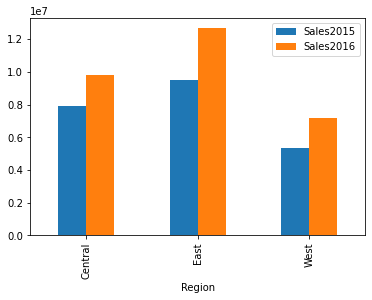

In [102]:
sales_df.pivot_table(index='Region',values=['Sales2015','Sales2016'],aggfunc='sum').plot(kind='bar',)
plt.show()

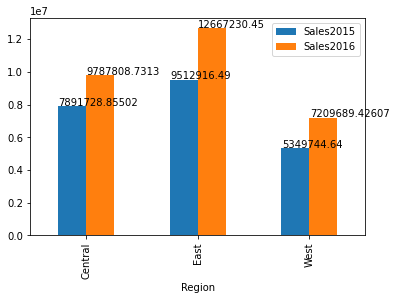

In [8]:
df=sales_df.pivot_table(index='Region',values=['Sales2015','Sales2016'],aggfunc='sum')
ax= df.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    ##How to make aesthetically good- rounding of this data label


### The contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart

<AxesSubplot:ylabel='Sales2016'>

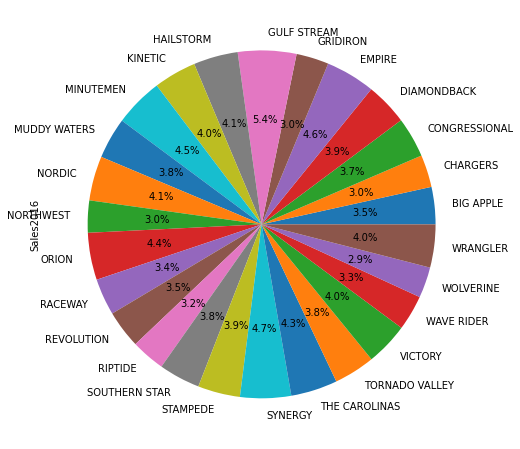

In [4]:
Percent_of_contribution=sales_df.pivot_table(index='Division',values=['Sales2016'],aggfunc='sum')*100/(sales_df.Sales2016.sum())

Percent_of_contribution.round(2).plot(kind='pie',y='Sales2016',figsize=(10,8),legend=False,autopct='%1.1f%%')

## How kept the Legend 


### Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [5]:
Tier_Region_wise_sales =sales_df.pivot_table(index=['Region','Tier'],values=['Sales2015','Sales2016'],aggfunc='sum')
Tier_Region_wise_sales

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

<AxesSubplot:title={'center':'Central'}, xlabel='Tier'>

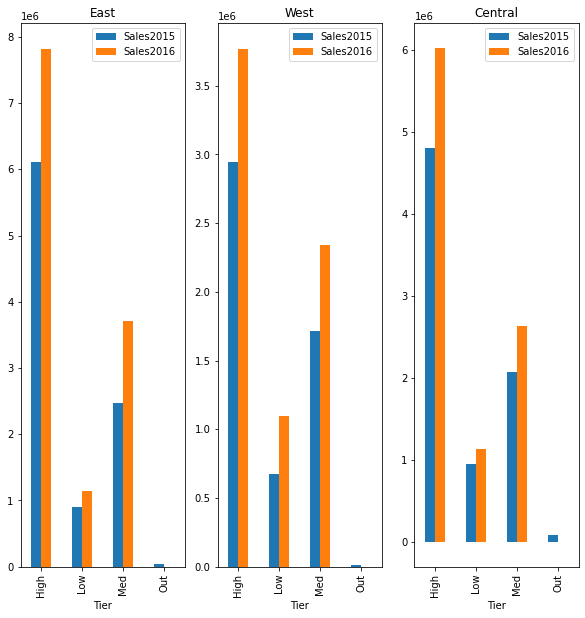

In [6]:
Tier_Region_wise_sales =pd.DataFrame(sales_df.pivot_table(index=['Region','Tier'],values=['Sales2015','Sales2016'],aggfunc='sum').reset_index())
East_Sales_Tier_wise = Tier_Region_wise_sales.loc[Tier_Region_wise_sales['Region']=='East'].set_index('Tier')
West_Sales_Tier_wise = Tier_Region_wise_sales.loc[Tier_Region_wise_sales['Region']=='West'].set_index('Tier')
Centra_Sales_Tier_wise = Tier_Region_wise_sales.loc[Tier_Region_wise_sales['Region']=='Central'].set_index('Tier')


fig, axes = plt.subplots(ncols=3,figsize=(10,10))
East_Sales_Tier_wise.plot(kind='bar',use_index=True,ax=axes[0],title='East')
West_Sales_Tier_wise.plot(kind='bar',use_index=True,ax=axes[1],title='West')
Centra_Sales_Tier_wise.plot(kind='bar',use_index=True,ax=axes[2],title='Central')

### In East region, which state registered a decline in 2016 as compared to 2015

In [7]:
east_st_wise_sales = sales_df.loc[sales_df['Region']=='East'].pivot_table(index=['State'],values=['Sales2015','Sales2016'],aggfunc='sum').reset_index()
east_st_wise_sales_declined_st= east_st_wise_sales.loc[east_st_wise_sales['Sales2016']<= east_st_wise_sales['Sales2015']]
east_st_wise_sales_declined_st

,State,Sales2015,Sales2016
10,NY,1725415.065,1703135.8


### In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015

<AxesSubplot:xlabel='Division'>

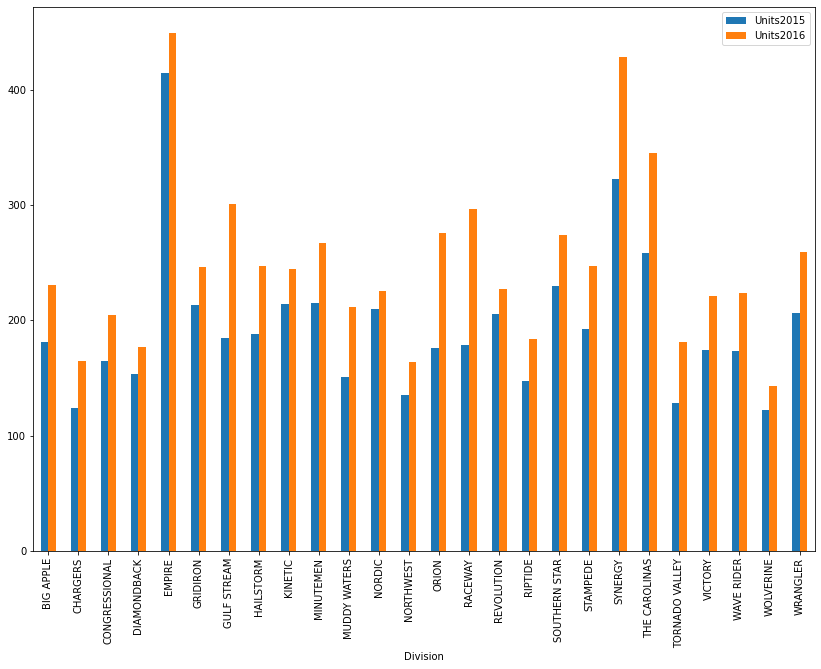

In [8]:
High_Tier_sales= sales_df.loc[sales_df['Tier']=='High']
High_Tier_sales.pivot_table(index='Division',values=['Units2015','Units2016'],aggfunc='sum').plot(kind='bar',figsize=(14,10))

In [9]:
declined_sales= High_Tier_sales.pivot_table(index='Division',values=['Units2015','Units2016'],aggfunc='sum')
declined_sales.loc[declined_sales['Units2015']>=declined_sales['Units2016']]

,Units2015,Units2016
Division,,


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### Quarter wise Segmentation  & BAR Plotting

In [42]:
### using NUMPY SELECT

### Codistions :
conditions =[(sales_df['Month']== 'Jan')|(sales_df['Month']== 'Feb')|(sales_df['Month']== 'Mar'),(sales_df['Month']== 'Apr')|(sales_df['Month']== 'May')|(sales_df['Month']== 'Jun'),(sales_df['Month']== 'Jul')|(sales_df['Month']== 'Aug')|(sales_df['Month']== 'Sep'),(sales_df['Month']== 'Oct')|(sales_df['Month']== 'Nov')|(sales_df['Month']== 'Dec')]
### Choices :
choices= ['Q1','Q2','Q3','Q4']
sales_df['Quarter']=np.select(conditions,choices)
sales_df

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


<AxesSubplot:xlabel='Quarter'>

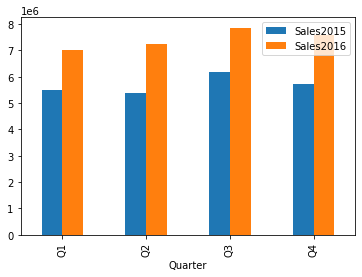

In [44]:
sales_df.pivot_table(index='Quarter',values=['Sales2015','Sales2016'],aggfunc='sum').plot(kind='bar')

### Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers

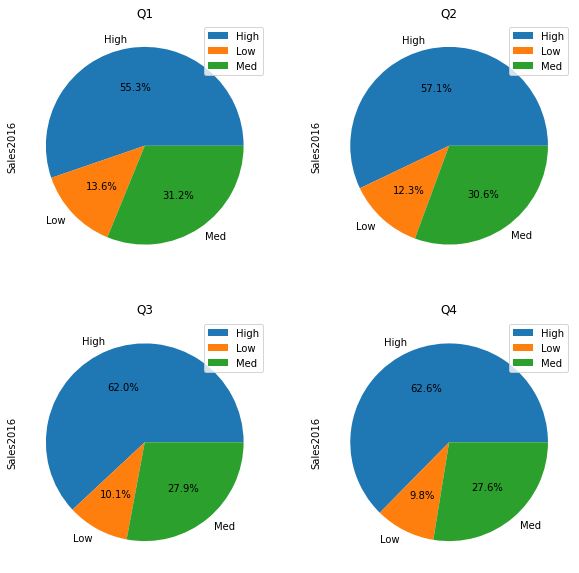

In [100]:

    choices= ['Q1','Q2','Q3','Q4']
    fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(10,10))
    i=0
    count=0
    for i in range(0,2):
        for j in range (0,2):

            quater_data= sales_df.loc[sales_df['Quarter']==choices[count],["Tier",'Sales2016']]
            quater_data.pivot_table(index='Tier',values='Sales2016',aggfunc='sum').head(3).plot(kind='pie',y='Sales2016',autopct='%1.1f%%',title=choices[count],ax=axes[i,j])
            count=count+1
### In the above code we have used .head() to remove the 'OUT' Tier as in the total sale of 2016 it is a single negative value impacting the Pie Chart.
### Another way to do it is by using data cleaing we can make the Negative 'OUT' data to Positive.   